In [1]:
%matplotlib inline
import numpy as np

In [2]:
from matplotlib.pylab import plt

# Activities

## Color

In [22]:
import numpy as np

In [23]:
from skimage.data import astronaut

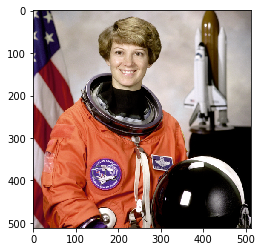

In [24]:
im = astronaut()
plt.imshow(im);

In [25]:
#1. Convert the coffee cup to YCbCr and render histograms of the channels

"""
YCbCr, Y means the Value combines of RBG, Y = w1 * R + w2 * G + w3 * B
Y is the value, also called the intensity
"""

# xyz are linear and is able to do lineqr transformation
import skimage.color
ycbcr = skimage.color.rgb2ycbcr(im)
red = im[:,:,0] 

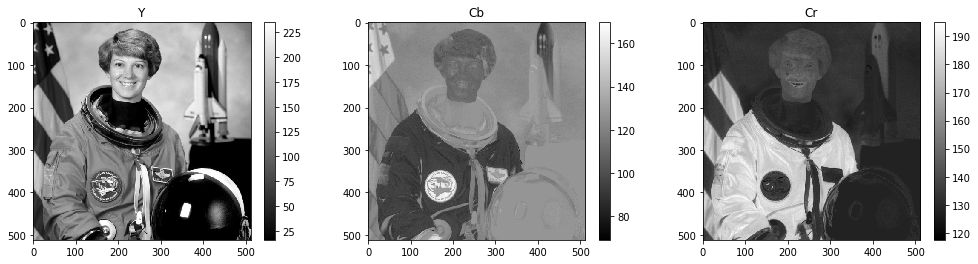

In [26]:
plt.figure(figsize=(17,4))
plt.subplot(1, 3, 1)
plt.title("Y")
plt.imshow(ycbcr[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Cb")
plt.imshow(ycbcr[:, :, 1], cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Cr")
plt.imshow(ycbcr[:, :, 2], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

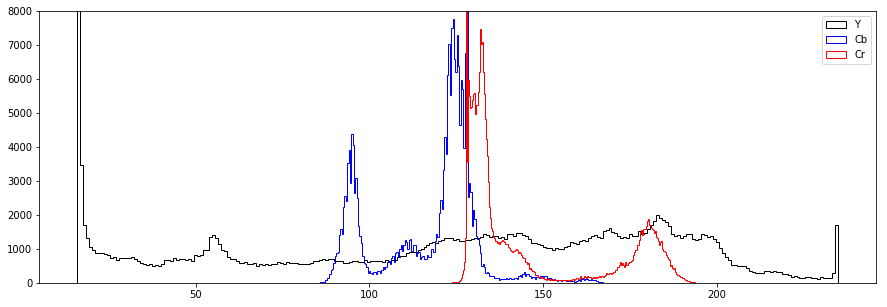

In [27]:
plt.figure(figsize=(15,5))
plt.hist(ycbcr[:, :, 0].flatten(), histtype='step', color='k', bins=255, label='Y');
plt.hist(ycbcr[:, :, 1].flatten(), histtype='step', color='b', bins=255, label='Cb');
plt.hist(ycbcr[:, :, 2].flatten(), histtype='step', color='r', bins=255, label='Cr');
plt.ylim(0, 8000)
plt.legend(ncol=1, loc='best')
plt.show()

No handles with labels found to put in legend.


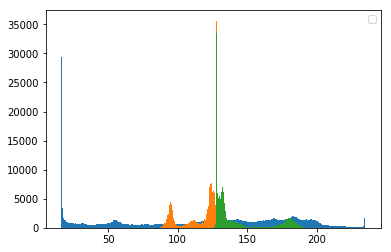

In [28]:
#3. Try to find a range of Y, Cr, Cb that select _only_ her face
plt.hist(ycbcr[:,:,0].flatten(), bins=255 )
plt.hist(ycbcr[:,:,1].flatten(), bins=255 )
plt.hist(ycbcr[:,:,2].flatten(), bins=255)
# HINT: you can use relational opterators like: ycbcr[:,:,1] > 50 work, they give you
plt.legend()
plt.savefig('foo.png')

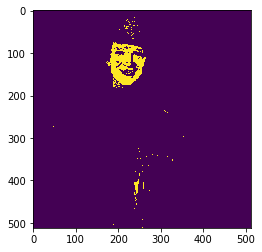

In [52]:
ybr = skimage.color.rgb2ycbcr(im)

Y =  ybr[:,:,0]
Cb = ybr[:,:,1]
Cr = ybr[:,:,2]

face = (Cb >= 101)  & (Cb <= 119) & (Cr > 140) & (Cr < 150) & (Y > 150)
plt.imshow(face) 
#show()

## Geometry

In [31]:
# 4. Try to construct an affine transfor, that crops in on the shuttle, and rotates it so it is pointing right. 

In [303]:
import math
skimage.transform.warp?
from skimage.transform import SimilarityTransform
from skimage.transform import AffineTransform
warp = skimage.transform.warp
tform = AffineTransform(translation=(300, 260),rotation=-math.pi / 2, scale = (0.6, 0.6)) 

[[[0.34509804 0.27058824 0.21176471]
  [0.30509804 0.23529412 0.17176471]
  [0.26431373 0.19686275 0.13333333]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.44156863 0.38352941 0.32941176]
  [0.42415686 0.36376471 0.30494118]
  [0.39513725 0.33192157 0.27262745]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.4972549  0.42588235 0.36941176]
  [0.49537255 0.43011765 0.37176471]
  [0.4812549  0.41945098 0.36235294]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.56862745 0.52627451 0.52      ]
  [0.55968627 0.5267451  0.50870588]
  [0.55545098 0.52862745 0.50368627]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.56862745 0.52862745 0.51529412]
  [0.56109804 0.52345098 0.50541176]


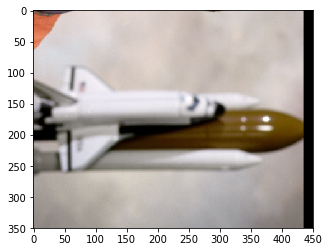

In [304]:
result = warp(im, tform, output_shape = (350, 450))

plt.imshow(result)  
type(result)
np.shape(result)
print(result)

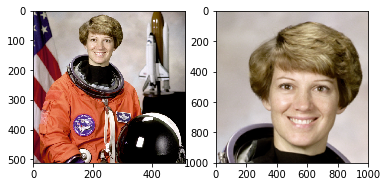

In [339]:
# 5. Try doing zooming in on her face by putting numbers into a 3x3 matrix (instead of using AffinTransform)
A = np.array([[0.2, 0, 110], [0, 0.2, 0], [0, 0, 1]])
#B = np.array([[1, 0, -350], [0, 1, 400], [0, 0, 1]])
#A = A.dot(B)
#np.linalg.inv(A)

plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(warp(im, A, output_shape = (1000, 1000)))

## Compositing

In [330]:
from urllib.request import urlretrieve
urlretrieve('https://qph.fs.quoracdn.net/main-qimg-968f41225522207012dd378705832939', 'glasses.png')

('glasses.png', <http.client.HTTPMessage at 0x186b2386550>)

In [325]:
# 1. Find an image (online) that includes an alpha channel

glasses = skimage.io.imread('glasses.png')

im  = skimage.util.img_as_float(im)
glasses = skimage.util.img_as_float(glasses)

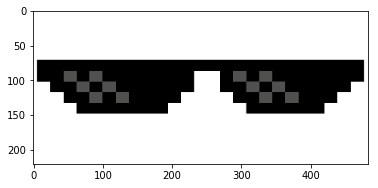

In [99]:
plt.imshow(glasses)

In [ ]:
# 2. Combine it with the astronaught image by alpha blending

In [37]:
glasses = skimage.transform.resize(glasses, (50, 50), mode='reflect', anti_aliasing=True)

# warp

alpha = glasses[:,:, 3]
glasses_rgb=glasses[:,:,:3]

NameError: name 'skimage' is not defined

In [38]:
alpha = alpha[:,:, None]

NameError: name 'alpha' is not defined

In [39]:
comp = (1-alpha)*im + alpha*glasses_rgb

NameError: name 'alpha' is not defined

In [40]:
imshow(comp)

NameError: name 'imshow' is not defined